In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/APEXFOOT.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
0  439 2018-05-08     APEXFOOT  331.7  ...  341.2    143       5.122  15,334
1  438 2018-06-08     APEXFOOT  331.2  ...  332.7     94       3.217   9,626
2  437 2018-07-08     APEXFOOT  327.1  ...  331.8    123       3.645  11,049
3  436 2018-08-08     APEXFOOT  325.1  ...  327.7    118       6.380  19,344
4  435 2018-09-08     APEXFOOT  322.0  ...  328.4    165       7.030  21,712

[5 rows x 12 columns]

In [2]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
36  403 2018-01-10     APEXFOOT  296.5  ...  298.9    139       2.509   8,392
59  380 2018-01-11     APEXFOOT  269.9  ...  270.7     72       1.005   3,724
37  402 2018-02-10     APEXFOOT  294.4  ...  297.9    237       5.574  18,816
79  360 2018-02-12     APEXFOOT  273.0  ...  273.9    107       2.479   9,064
16  423 2018-03-09     APEXFOOT  319.7  ...  309.5    224       8.640  26,931

[5 rows x 12 columns]

In [3]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE   LTP*   HIGH  ...    YCP  TRADE  VALUE (mn)  VOLUME
DATE                                        ...                                  
2018-01-10  403     APEXFOOT  296.5  300.1  ...  298.9    139       2.509   8,392
2018-01-11  380     APEXFOOT  269.9  273.0  ...  270.7     72       1.005   3,724
2018-02-10  402     APEXFOOT  294.4  297.9  ...  297.9    237       5.574  18,816

[3 rows x 11 columns]

In [4]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [5]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [6]:
df['volatility'] = df['volatility']*100

In [7]:
import matplotlib.pyplot as plt 

In [8]:
df=df.reset_index()['volatility']

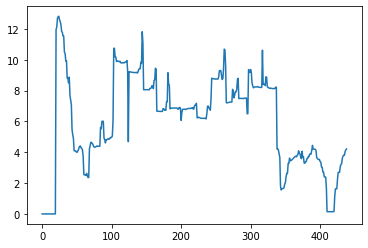

In [9]:
plt.plot(df)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df.shape

(439, 1)

In [12]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:

training_size,test_size

(307, 132)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:



#1D cnn model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 85ms/step - loss: 0.1779 - val_loss: 0.0455
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0305 - val_loss: 0.0729
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0201 - val_loss: 0.0535
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0191 - val_loss: 0.0580
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0138 - val_loss: 0.0641
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0119 - val_loss: 0.0728
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0085 - val_loss: 0.0777
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0067 - val_loss: 0.1006
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0062 - val_loss: 0.1203
Epoch 10/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0057 - val_loss: 0.1100
Epoch 11/100
7/7 [=

In [19]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [20]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [22]:
Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

5.46823826703276

In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,test_predict)
print('MAE: %f' % mae)

MAE: 5.332028


In [24]:
Y_test

array([[2.39999932],
       [2.39133286],
       [1.70376606],
       [0.14387177],
       [0.14387177],
       [0.14387177],
       [0.14387177],
       [0.14387177],
       [0.14387177],
       [0.14387177],
       [0.14387177],
       [0.14387177],
       [0.14387177],
       [0.15983648],
       [1.11889194],
       [1.62668515],
       [1.62668515],
       [1.62509398],
       [2.25079261],
       [2.69872078],
       [2.70246724],
       [2.70246724],
       [3.07388197],
       [3.20771914],
       [3.26346145],
       [3.62172975],
       [3.76110493],
       [3.81095094],
       [3.81163522],
       [4.0595256 ],
       [4.15521911]])

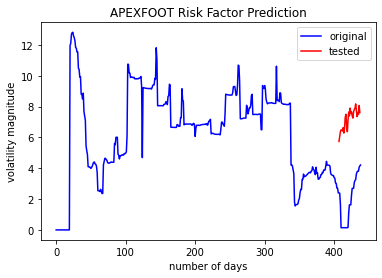

In [26]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
#plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('APEXFOOT Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [27]:
len(test_data)

132

In [28]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape


(1, 100)

In [29]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [30]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.5718916]
101
1 day input [0.32263292 0.30367284 0.2849645  0.13997536 0.12115192 0.12805407
 0.12831157 0.12871967 0.13247169 0.15064282 0.15858914 0.18794618
 0.20505352 0.20470837 0.25546745 0.25546091 0.28237207 0.26862035
 0.27062176 0.27217356 0.27593569 0.27949973 0.28416343 0.2868073
 0.29070917 0.29129565 0.28889592 0.29661906 0.29996952 0.31914422
 0.306873   0.30433094 0.28954393 0.27959954 0.31680574 0.28728705
 0.2892624  0.25742934 0.25634669 0.26353915 0.2652765  0.27961082
 0.28066932 0.29022858 0.28991563 0.30260387 0.30264388 0.30339024
 0.32293117 0.34670194 0.32809055 0.3276599  0.32756686 0.32723741
 0.32216762 0.2871018  0.27941307 0.27714358 0.27528254 0.27526547
 0.26494889 0.2617989  0.2373987  0.23541548 0.21182412 0.21076443
 0.18708407 0.18707429 0.18639876 0.13280455 0.01121447 0.01121447
 0.01121447 0.01121447 0.01121447 0.01121447 0.01121447 0.01121447
 0.01121447 0.01121447 0.01245888 0.08721499 0.12679627 0.12679627
 0.12667225 0.17544398 0.21035892 0

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [33]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [34]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])

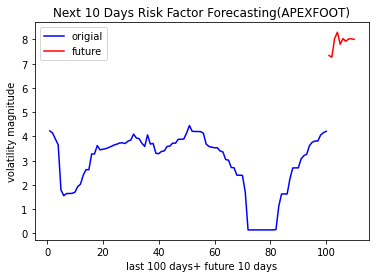

In [45]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Risk Factor Forecasting(APEXFOOT)')
plt.legend(loc='best')
plt.show(block=False)

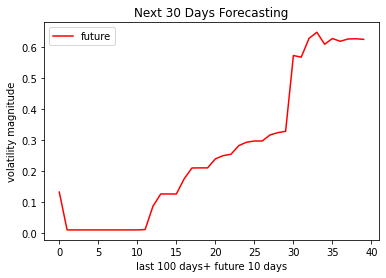

In [37]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [38]:
df3=scaler.inverse_transform(df3).tolist()

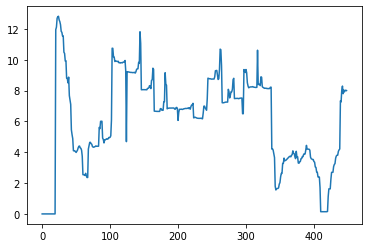

In [39]:
plt.plot(df3)